In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

### Wczytanie danych + podział

In [48]:
data = pd.read_csv('../Data/movie_statistic_dataset.csv')

In [49]:
our_data, validator_data = train_test_split(data, test_size = 0.2, random_state = 42)
our_data.to_csv('../Data/our_data.csv', index = False)
validator_data.to_csv('../Data/validator_data.csv', index = False)

X = our_data

X_train, X_val = train_test_split(
    X, test_size=0.2, random_state=42 #stratify mażnaby dodać ale wiem po jakiej kolumnie
)
X_val, X_test = train_test_split(
    X_val, test_size=0.3, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

(2803, 14) (490, 14) (211, 14)


## EDA

In [54]:
df = pd.read_csv('../Data/our_data.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           3504 non-null   object 
 1   production_date       3504 non-null   object 
 2   genres                3504 non-null   object 
 3   runtime_minutes       3504 non-null   float64
 4   director_name         3504 non-null   object 
 5   director_professions  3504 non-null   object 
 6   director_birthYear    3504 non-null   object 
 7   director_deathYear    3504 non-null   object 
 8   movie_averageRating   3504 non-null   float64
 9   movie_numerOfVotes    3504 non-null   float64
 10  approval_Index        3504 non-null   float64
 11  Production budget $   3504 non-null   int64  
 12  Domestic gross $      3504 non-null   int64  
 13  Worldwide gross $     3504 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 383.4+ KB


### Opisy kolumn:
- Movie_title
- Production_date
- Genres
- Runtime_minutes
- Director_name (primaryName)
- Director_professions (primaryProfession)
- Director_birthYear
- Director_deathYear
- Movie_averageRating : refers to the average rating given by online users for particular movie
- Movie_numberOfVotes : refers to the number of votes given by online users for a particular movie
- Approval_Index :is a normalized indicator (on scale 0-10) calculated by multiplying the logarithm of the number of votes by the average users rating. It provides a concise measure of a movie's overall popularity and approval among online viewers, penalizing both films that got too few reviews and blockbusters that got too many.
- Production_budget ( $)
- Domestic_gross ($)
- Worldwide_gross ($)

nie ma wartości null, fajnie

In [51]:
df.head(20)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,50000000,75624550,118729073
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,14000000,46800000,185400000
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,9500000,57176582,59675307
5,Melancholia,2011-11-11,"Drama,Sci-Fi",135.0,Lars von Trier,"writer,director,producer",1956,alive,7.1,185676.0,6.205598,9400000,3030848,21817298
6,The Kite Runner,2007-12-14,Drama,128.0,Marc Forster,"producer,director,writer",1969,alive,7.6,80886.0,6.187246,20000000,15800078,74180745
7,Noah,2014-03-27,"Action,Adventure,Drama",138.0,Darren Aronofsky,"producer,writer,director",1969,alive,5.8,257429.0,5.184656,130000000,101200044,352831065
8,Overboard,2018-05-04,"Comedy,Romance",112.0,Rob Greenberg,"producer,director,writer",\N,alive,6.0,39291.0,4.538167,12000000,50316123,91244913
9,The Girl Next Door,2004-04-09,"Comedy,Drama,Romance",109.0,Luke Greenfield,"director,producer,writer",1972,alive,6.7,227685.0,5.949102,25000000,14589444,31635150


### obserwacje:
- kolumny "genres","director_professions": zawierają po kilka wartości, dobrze by było rozdzielić jakoś może
- są wartości brakujące w postaci "-", "\N" w niektórych kolumnach zwłaszcza nienumerycznych (do sprawdzenia dokładniej ile itd.)
- Naszym celem będzie pewnie zgrupowanie podobnych filmów tak, żeby móc np zasugerować komuś film który mogłby mu się spodobac na podstawie oglądanych wcześniej? - TAK ZGADUJE, PEWNA NIE JESTEM

### to do:
- rozdzielić wartości w genres i director professions jakoś lub zmodyfikować, date produkcji jakoś rozdzielić
- zmodyfikować kolumny z rokiem urodzenia i śmierci reżysera żeby miało sens bardziej
- można zrobić kilka countplotów z podziałem na różne genres albo np. rok produkcji
- sprawdzić rozkłady zmiennych numerycznych (podzielić w ogóle jakoś kategoryczne od numerycznych i osobno analizować) - DONE
- macierz korelacji dla zmiennych numerycznych? - DONE
- sprawdzic brakujące wartości (głównie dla kategorycznych ale dla numerycznych można też)
- sprawdzić ile z filmów to jakieś franchises (Piraci z Karaibów, Avengers itd.)?

In [52]:
#PODZIAŁ NA KOLUMNY Z DANYMI KATEGORYCZNYMI I NUMERYCZNYMI
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(exclude=['object']).columns

print(cat_columns)
print(num_columns)

Index(['movie_title', 'production_date', 'genres', 'director_name',
       'director_professions', 'director_birthYear', 'director_deathYear'],
      dtype='object')
Index(['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')


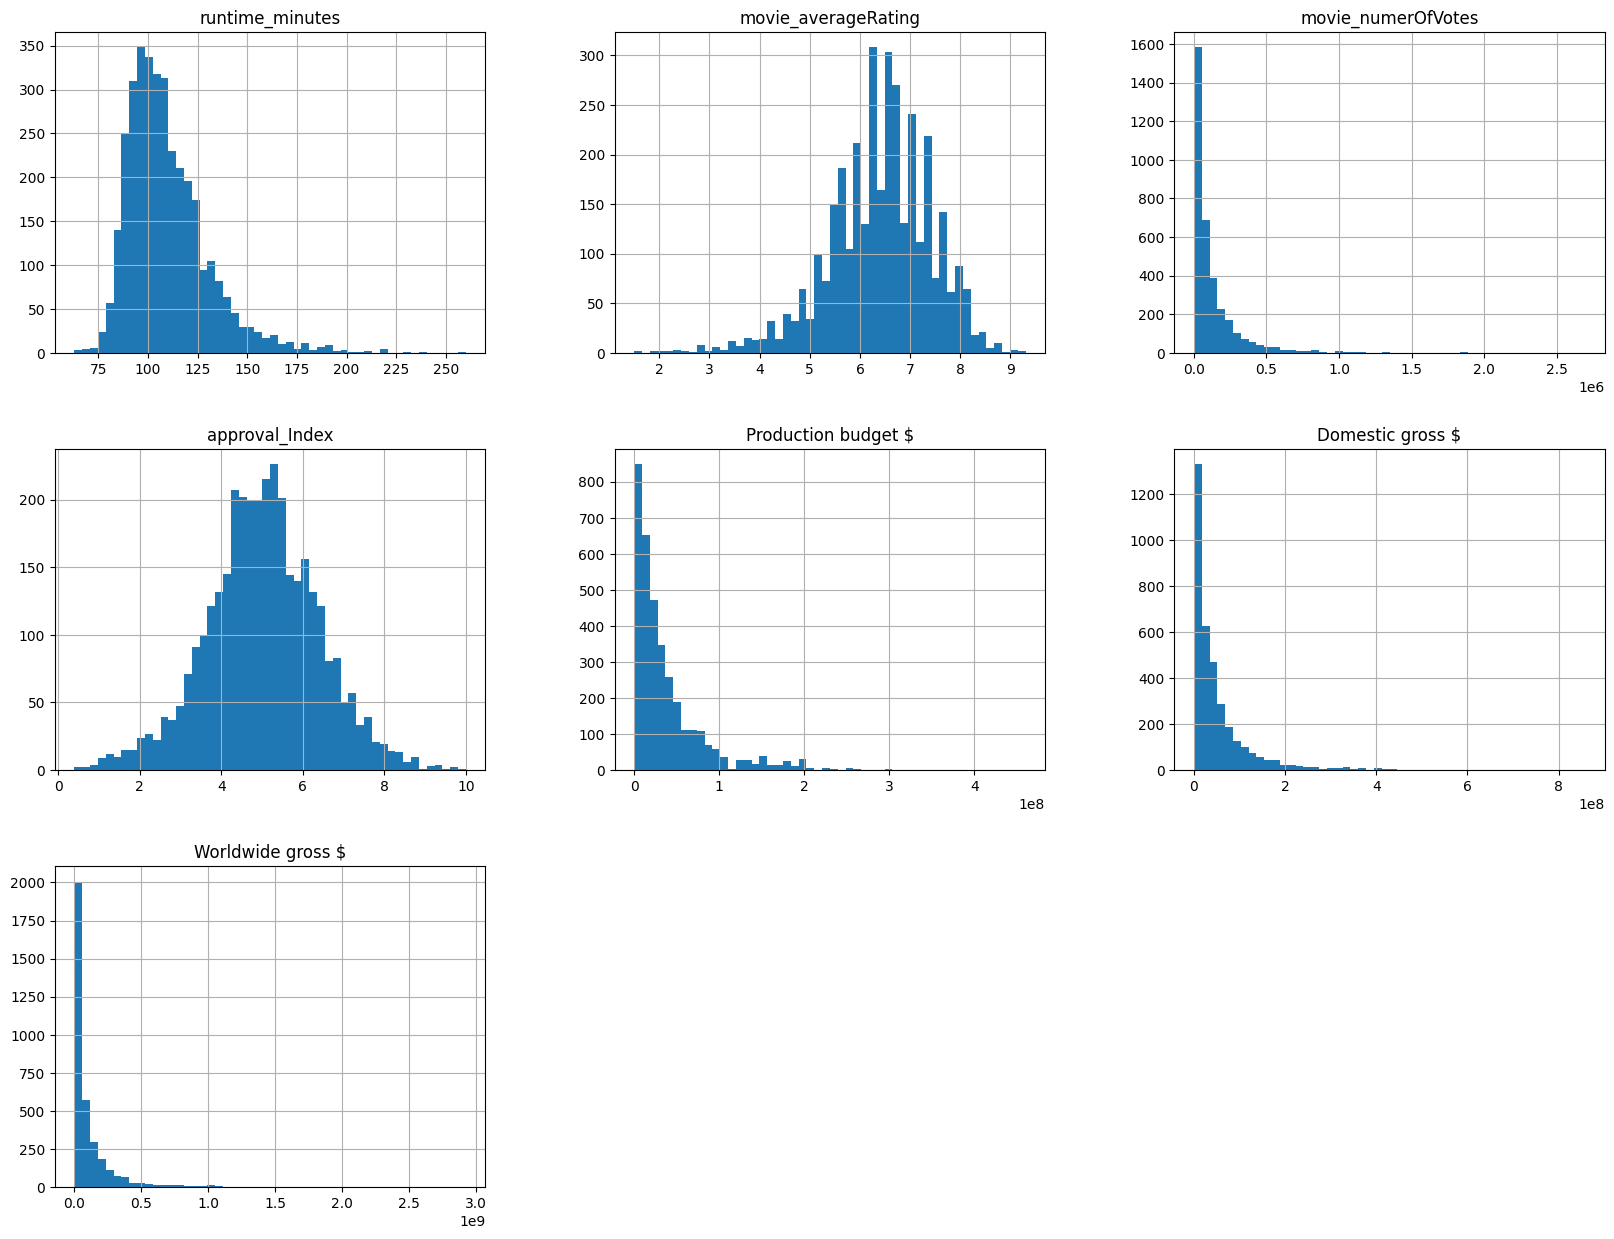

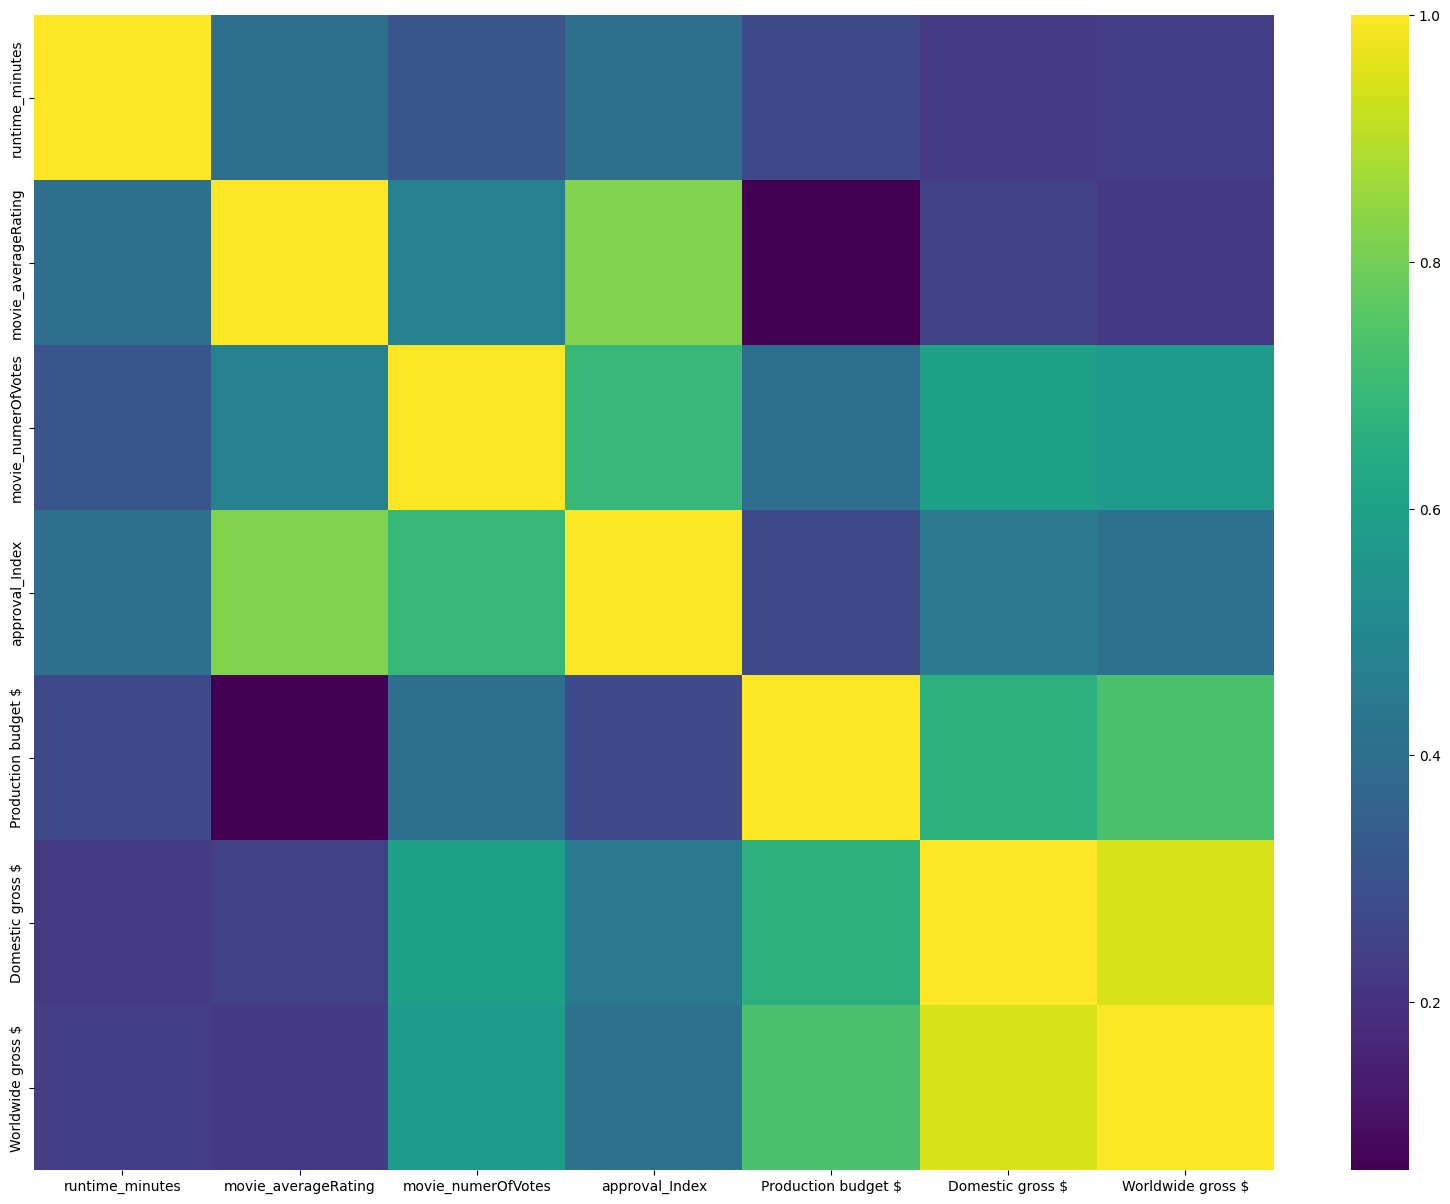

korelacje z Worldwide gross $


Worldwide gross $      1.000000
Domestic gross $       0.943244
Production budget $    0.732187
movie_numerOfVotes     0.572210
approval_Index         0.408324
runtime_minutes        0.234767
movie_averageRating    0.219798
Name: Worldwide gross $, dtype: float64

In [53]:
df.describe()

#DLA DANYCH NUMERYCZNYCH ZBADAĆ ICH ROZKŁAD
df[num_columns].hist(bins=50, figsize=(20,15))
plt.show()

#ZNALEZIENIE KORELACJI MIĘDZY KOLUMNAMI
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, fmt=".2f", cmap='viridis')
plt.show()

#SORTOWANIE KORELACJI DLA DANEJ KOLUMNY
print("korelacje z Worldwide gross $")
corr_matrix["Worldwide gross $"].sort_values(ascending=False)